In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time as time
from scipy.integrate import solve_ivp

from rungekutta import RK4_test_solver, adaptive_RK34
from lotkavolterra import LotkaVolterra
from vanderpol import VanDerPol

# Task 1.1

Showcase that the error in the RK4 method is $\mathcal{O}(h^4)$, where $h$ is the step size.

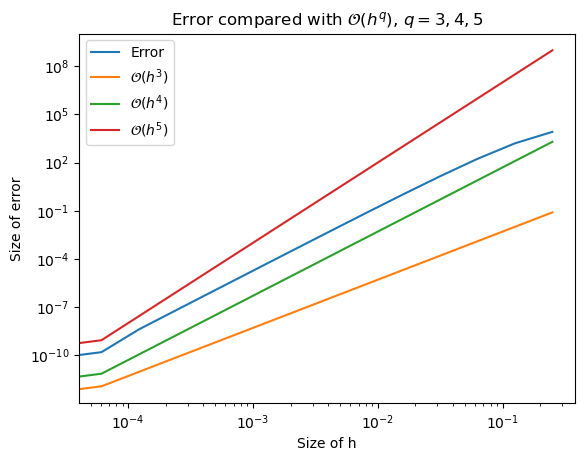

In [36]:
err  = np.zeros([14])
stepsize = np.zeros([14])
t0 = 0
tf = 1
u0 = np.array([1])

test_func = lambda _, y: 10 * y
true_solution = lambda t: np.exp(10 * t) * u0

for i in range(2,15):
    N = 2**i
    h = (tf - t0) / N
    stepsize[i - 2] = h
    _, _, newerr = RK4_test_solver(test_func, true_solution, u0, t0, tf, N)
    err[i - 2] = np.abs(newerr[:, N])
plt.loglog(stepsize, err)
plt.loglog(stepsize, 5*stepsize**3)
plt.loglog(stepsize, 500000*stepsize**4)
plt.loglog(stepsize, (10**12)*stepsize**5)
plt.legend(['Error', '$\mathcal{O}(h^3)$', '$\mathcal{O}(h^4)$', '$\mathcal{O}(h^5)$'])
plt.xlabel('Size of h')
plt.ylabel('Size of error')
plt.title('Error compared with $\mathcal{O}(h^q)$, $q=3, 4, 5$')
plt.savefig("plots/task1.1.pdf")
plt.show()

# Task 1.4
Solving the equation $y'=f(t, y)$ using an adaptive RK34 solver. Here the test equation $f(t, y)=10y$ is used.

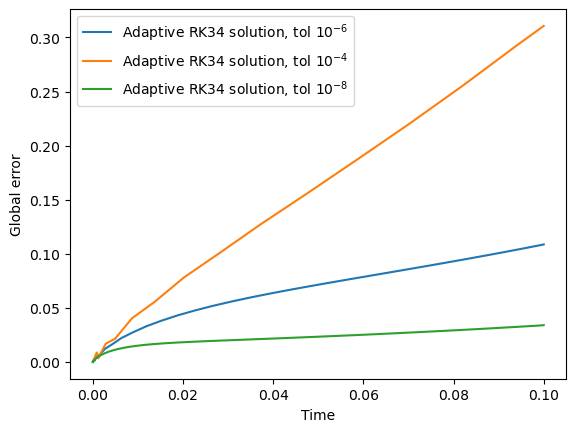

In [35]:
f = lambda _, u: 10 * u
t0 = 0
tf = 0.1
y0 = np.array([1,2,3])
tol1 = 10**(-6)
t1, y1 = adaptive_RK34(f,t0, tf, y0, tol1)
tol2 = 10**(-4)
t2, y2 = adaptive_RK34(f,t0, tf, y0, tol2)
tol3 = 10**(-8)
t3, y3 = adaptive_RK34(f,t0, tf, y0, tol3)


plt.plot(t1, np.exp(10*t1)*y0[0] - y1[0,:])
plt.plot(t2, np.exp(10*t2)*y0[0] - y2[0,:])
plt.plot(t3, np.exp(10*t3)*y0[0] - y3[0,:])
plt.legend(['Adaptive RK34 solution, tol $10^{-6}$', 'Adaptive RK34 solution, tol $10^{-4}$', 'Adaptive RK34 solution, tol $10^{-8}$', 'True Solution'])
plt.xlabel('Time')
plt.ylabel('Global error')
plt.savefig("plots/task1.4.pdf")
plt.show()

# Task 2.1

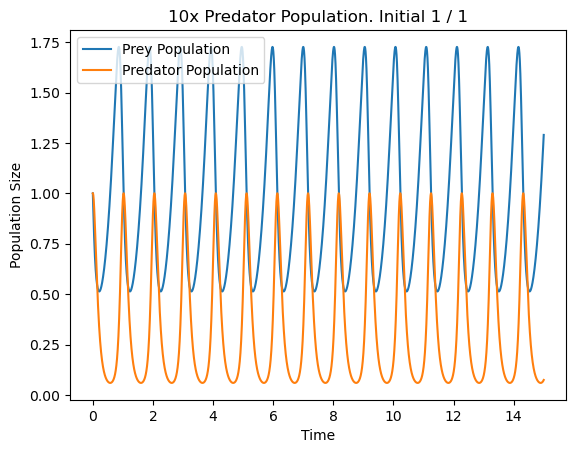

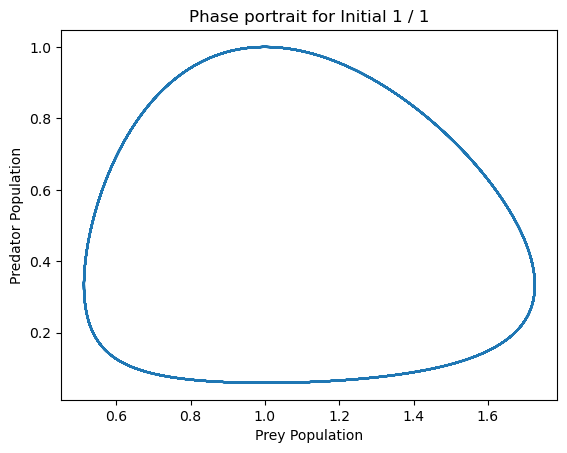

In [37]:
de = LotkaVolterra(3, 9, 15, 15, 1, 1)
t0 = 0
tf = 15
tol = 10**(-9)
f = de.get_f()

def predator_prey_plot(x0, y0, title):
    u0 = np.array([x0, y0])
    t_grid, u = adaptive_RK34(f, t0, tf, u0, tol)
    
    plt.plot(t_grid, u[0,:])
    plt.plot(t_grid, u[1,:])
    plt.legend(["Prey Population", "Predator Population"])
    plt.xlabel("Time")
    plt.ylabel("Population Size")
    plt.title(title + f" Initial {x0} / {y0}")
    plt.savefig(f"plots/task2.1_time_{x0}_{y0}.svg")
    plt.show()

    plt.plot(u[0,:], u[1,:])
    plt.xlabel("Prey Population")
    plt.ylabel("Predator Population")
    plt.title('Phase portrait for' + f" Initial {x0} / {y0}")
    plt.savefig(f"plots/task2.1_phase_{x0}_{y0}.svg")
    plt.show()

x0, y0 = 1, 1
predator_prey_plot(x0, y0, "10x Predator Population.")

It can be seen in the upper plot that the period time for the specified problem is 1.

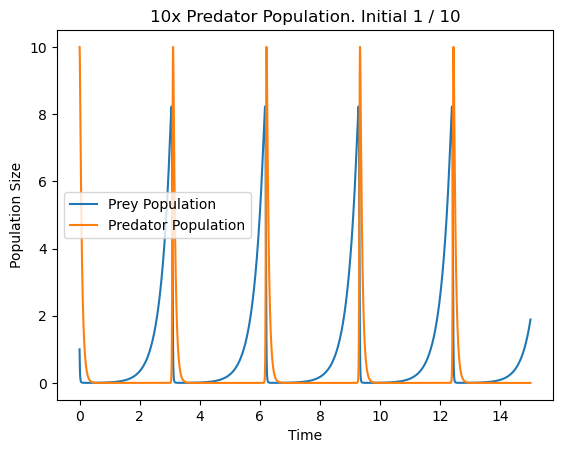

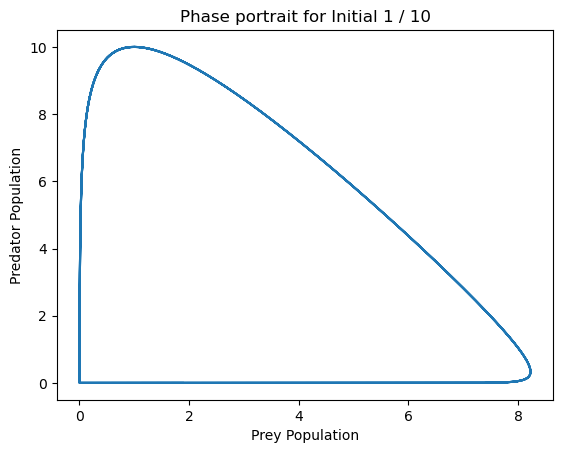

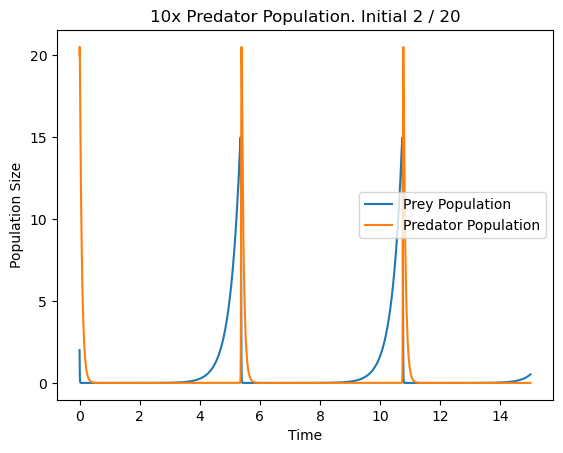

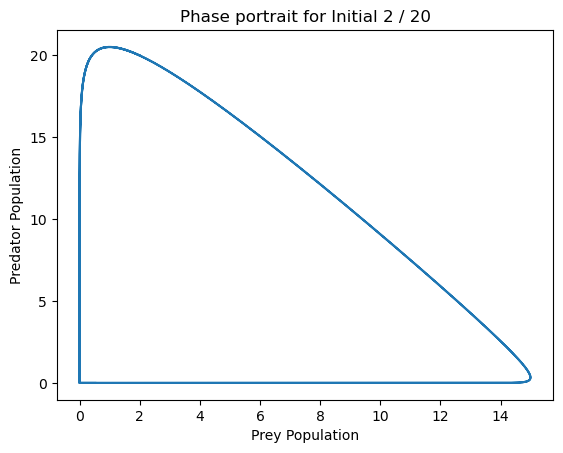

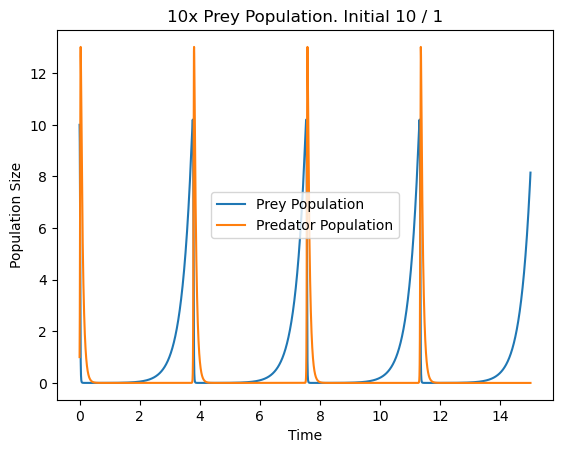

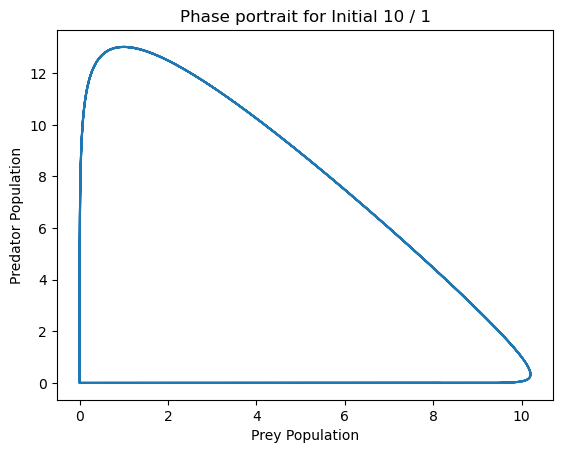

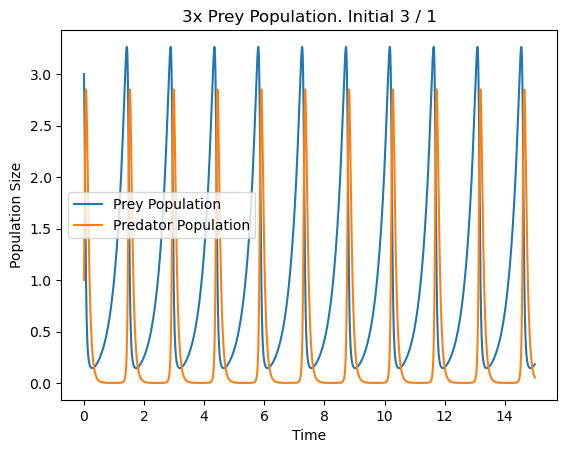

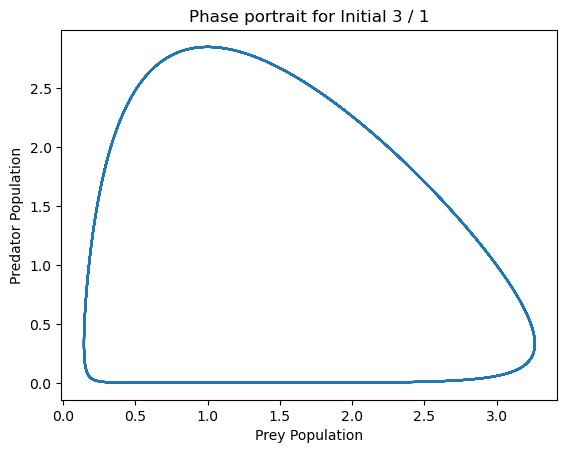

In [38]:
x0, y0 = 1, 10
predator_prey_plot(x0, y0, "10x Predator Population.")

x0, y0 = 2, 20
predator_prey_plot(x0, y0, "10x Predator Population.")

x0, y0 = 10, 1
predator_prey_plot(x0, y0, "10x Prey Population.")

x0, y0 = 3, 1
predator_prey_plot(x0, y0, "3x Prey Population.")

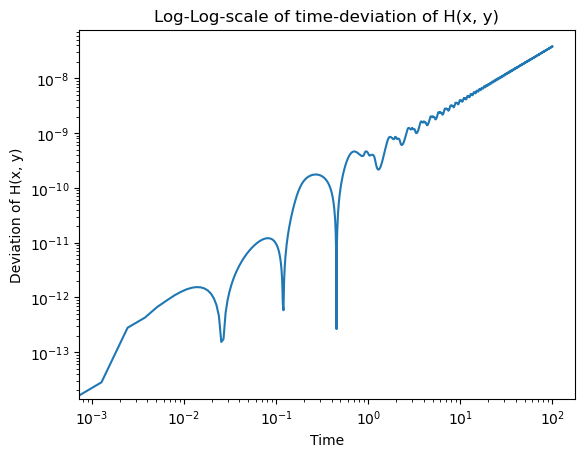

In [40]:
u0 = de.u0
tf = 100
H = de.get_H()

t_grid, u = adaptive_RK34(f, t0, tf, u0, tol)

x0 = u0[0]
y0 = u0[1]
x = u[0, :]
y = u[1, :]

plt.loglog(t_grid, np.abs(H(x, y)/H(x0, y0) - 1))
plt.xlabel('Time')
plt.ylabel('Deviation of H(x, y)')
plt.title('Log-Log-scale of time-deviation of H(x, y)')
plt.savefig("plots/task2.1_H_loglog.svg")
plt.show()

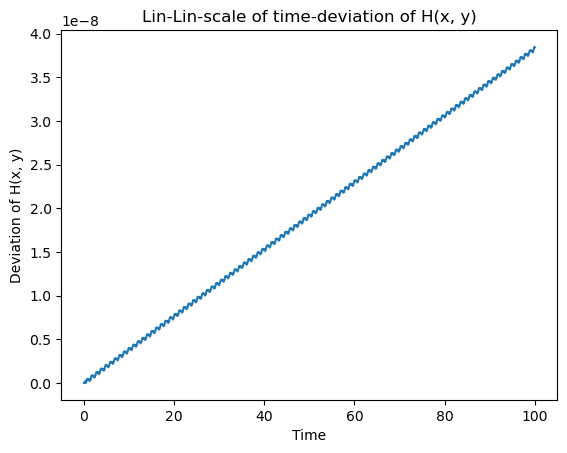

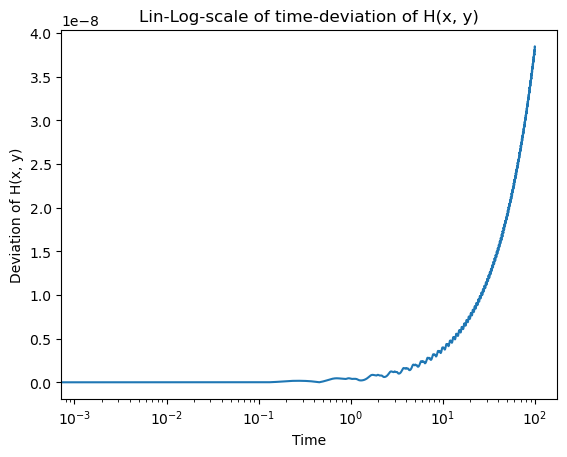

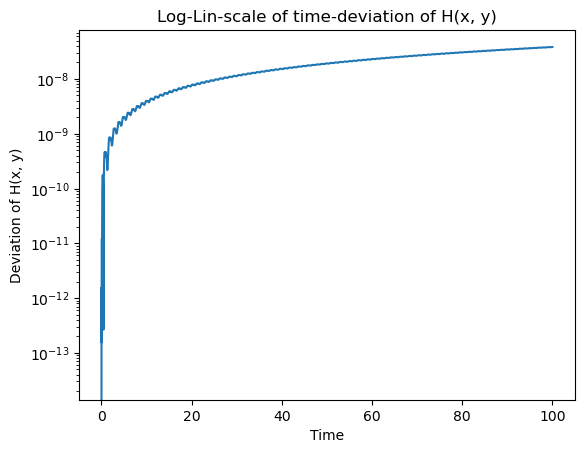

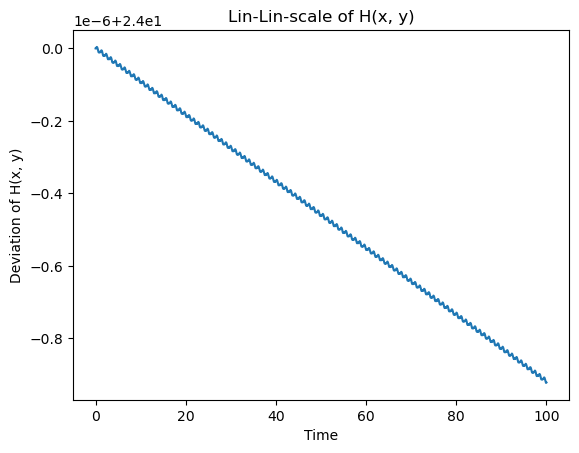

In [41]:
plt.plot(t_grid, np.abs(H(x, y)/H(x0, y0) - 1))
plt.xlabel('Time')
plt.ylabel('Deviation of H(x, y)')
plt.title('Lin-Lin-scale of time-deviation of H(x, y)')
plt.savefig("plots/task2.1_H_linlin.svg")
plt.show()

plt.semilogx(t_grid, np.abs(H(x, y)/H(x0, y0) - 1))
plt.xlabel('Time')
plt.ylabel('Deviation of H(x, y)')
plt.title('Lin-Log-scale of time-deviation of H(x, y)')
plt.savefig("plots/task2.1_H_linlog.svg")
plt.show()

plt.semilogy(t_grid, np.abs(H(x, y)/H(x0, y0) - 1))
plt.xlabel('Time')
plt.ylabel('Deviation of H(x, y)')
plt.title('Log-Lin-scale of time-deviation of H(x, y)')
plt.savefig("plots/task2.1_H_loglin.svg")
plt.show()
plt.plot(t_grid, H(x, y))
plt.xlabel('Time')
plt.ylabel('Deviation of H(x, y)')
plt.title('Lin-Lin-scale of H(x, y)')
plt.savefig("plots/task2.1_H_linlin2.svg")
plt.show()

# Task 3.1

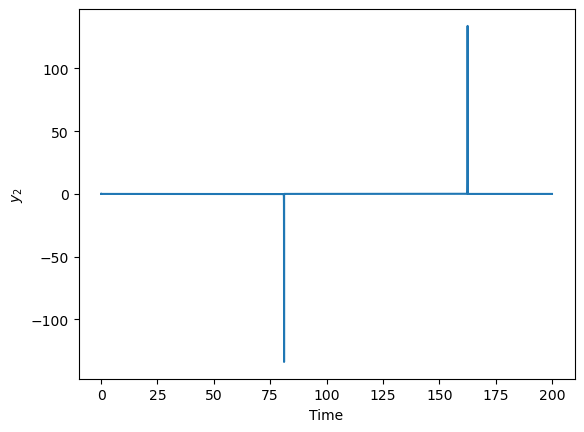

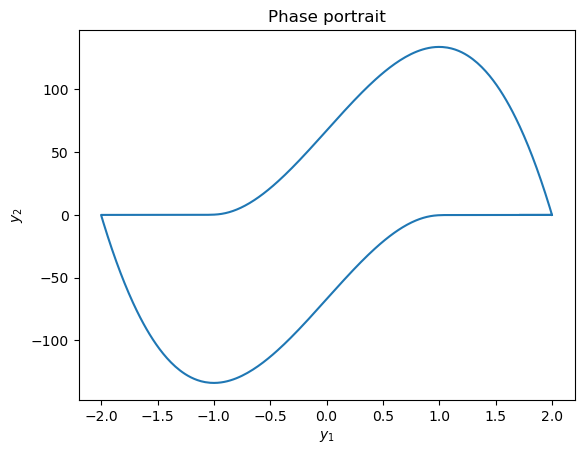

In [42]:
mu = 100
de = VanDerPol(mu, 2, 0)
f = de.get_f()
u0 = de.u0
t0 = 0
tf = 2*mu
tol = 10**(-6)
t_grid, u = adaptive_RK34(f, t0, tf, u0, tol)


plt.plot(t_grid, u[1, :])
plt.xlabel('Time')
plt.ylabel('$y_2$')
plt.savefig("plots/task3.1_time.svg")
plt.show()

plt.plot(u[0, :], u[1, :])
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title('Phase portrait')
plt.savefig("plots/task3.1_phase.svg")
plt.show()

# Task 3.2

In [47]:
E6 = np.array([10, 15, 22, 33, 47, 68, 100, 150, 220, 330, 470]) # 680, 1000])

solutions = {}

for mu in E6:
    t1 = time.time()
    de = VanDerPol(mu, 2, 0)
    f = de.get_f()
    u0 = de.u0
    tol = 10**(-6)
    t0 = 0
    tf = 0.7*mu
    t_grid, u = adaptive_RK34(f, t0, tf, u0, tol)
    solutions[mu] = (t_grid, u)
    t2 = time.time()
    print(str(mu) + ':' + str(t2 - t1))
    

10:0.019192218780517578
15:0.020673036575317383
22:0.023651123046875
33:0.03191995620727539
47:0.058854103088378906
68:0.12704896926879883
100:0.27486300468444824
150:0.6453609466552734
220:1.5923519134521484
330:4.718268871307373
470:17.286027193069458


The computing time for the series becomes very long for mu = 680, 1000

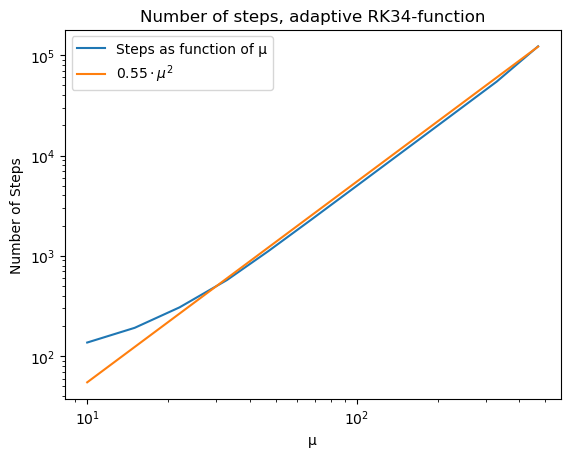

In [55]:
num_steps = [np.size(solutions[mu][0]) for mu in E6]

plt.loglog(E6, num_steps)
plt.loglog(E6, 0.55*E6**2)
plt.xlabel('\u03bc')
plt.ylabel("Number of Steps")
plt.legend(['Steps as function of \u03bc', '$0.55\cdot\mu^{2}$'])
plt.title('Number of steps, adaptive RK34-function')
plt.savefig("plots/task3.2.svg")
plt.show()

Stiffness is proportional to the number of steps, so the stiffness is proportional to $\mu^q\approx\mu^{2}$

# Task 3.3

In [56]:
E6_imp = np.array([10, 15, 22, 33, 47, 68, 100, 150, 220, 330, 470, 680, 1000])

solutions_imp = {}

for mu in E6_imp:
    t1 = time.time()
    de = VanDerPol(mu, 2, 0)
    f = de.get_f()
    u0 = de.u0
    tol = 10**(-6)
    t0 = 0
    tf = 2*mu
    sol = solve_ivp(f, [t0, tf], u0, method='BDF')
    solutions_imp[mu] = (sol["t"], sol["y"])
    t2 = time.time()
    print(str(mu) + ':' + str(t2 - t1))

10:0.06667184829711914
15:0.04036211967468262
22:0.04060697555541992
33:0.040329933166503906
47:0.043968915939331055
68:0.06027412414550781
100:0.05760622024536133
150:0.05947422981262207
220:0.05387401580810547
330:0.06866097450256348
470:0.07741308212280273
680:0.08315181732177734
1000:0.08761429786682129


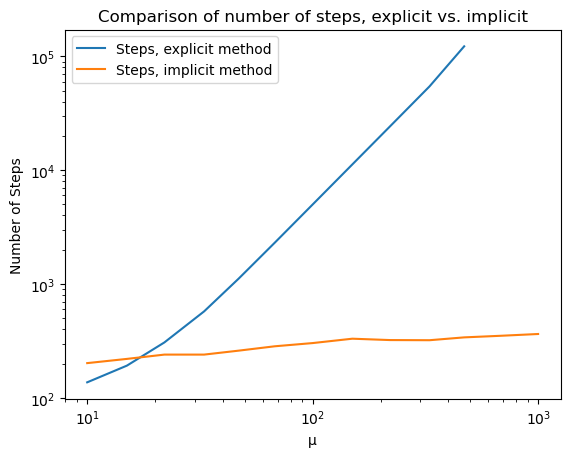

In [57]:
num_steps_imp = [np.size(solutions_imp[mu][0]) for mu in E6_imp]

plt.loglog(E6, num_steps)
plt.loglog(E6_imp, num_steps_imp)
plt.xlabel('\u03bc')
plt.ylabel("Number of Steps")
plt.legend(['Steps, explicit method', 'Steps, implicit method'])
plt.title('Comparison of number of steps, explicit vs. implicit')
plt.savefig("plots/task3.3.svg")
plt.show()